# **Klasifikasi Keterkaitan Program Sekolah Adiwiyata dengan Indikator Kualitas Lingkungan Daerah di Indonesia Menggunakan Model LightGBM**

## **Pendahuluan**

Permasalahan lingkungan seperti pencemaran udara, pencemaran air, dan pengelolaan sampah masih menjadi tantangan utama di Indonesia. Pemerintah melalui program **Sekolah Adiwiyata**
berupaya meningkatkan kesadaran dan perilaku lingkungan sejak usia sekolah.

Penelitian ini bertujuan untuk menganalisis apakah keberadaan dan intensitas Sekolah Adiwiyata
berkorelasi dan berkontribusi terhadap efektivitas kualitas lingkungan di tingkat provinsi,
dengan mempertimbangkan variabel lingkungan dan sosial lainnya.



## **Tujuan Penelitian**

1. Mengintegrasikan data lingkungan dan sosial dari berbagai sumber.
2. Menganalisis hubungan antara Sekolah Adiwiyata dan kualitas lingkungan.
3. Membangun model klasifikasi efektivitas berbasis LightGBM.
4. Mengidentifikasi faktor paling berpengaruh terhadap efektivitas lingkungan.


## **Inisialisasi**

> Penelitian ini menggunakan bahasa pemrograman Python dengan pustaka
pandas, NumPy, LightGBM, Matplotlib, dan Scikit-learn untuk pengolahan data,
visualisasi, serta pemodelan klasifikasi. Dataset diakses melalui Google Drive
menggunakan lingkungan Google Colaboratory.


In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
import re
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## **Data Assessment**

Tahap data assessment dilakukan untuk mengevaluasi kualitas dan karakteristik
awal dari setiap dataset yang digunakan dalam penelitian. Pemeriksaan meliputi
jumlah observasi dan variabel, tipe data, keberadaan nilai hilang (missing values),
duplikasi data, serta peninjauan contoh data.



Tahap ini bertujuan untuk mengidentifikasi potensi inkonsistensi, anomali, dan perbedaan struktur data antar sumber sebelum dilakukan proses
pembersihan dan penggabungan data.



In [ ]:
df_ika = pd.read_csv("datasains/Dataset_DS/Indeks_Kualitas_Air.csv")
df_iku = pd.read_csv("datasains/Dataset_DS/indeks_kualitas_udara.csv")
df_sekolah = pd.read_csv("datasains/Dataset_DS/sekolah adiwiyata - sekolah adiwiyata.csv")
df_rth = pd.read_excel("datasains/Dataset_DS/Data_RTH.xlsx")
df_sampah = pd.read_excel("datasains/Dataset_DS/Data_Timbulan_Sampah.xlsx")

In [ ]:
# fungsi untuk assessment data
# Fungsi initial_assessment digunakan untuk melakukan pemeriksaan awal dataset,
# meliputi:
# - jumlah baris dan kolom
# - tipe data setiap variabel
# - jumlah nilai hilang (missing values)
# - jumlah baris duplikat
# - contoh data awal
# Hasil pemeriksaan ini digunakan sebagai dasar pengambilan keputusan
# pada tahap data cleaning dan preprocessing.

def initial_assessment(df, dataset_name):
    print("="*60)
    print(f"DATASET : {dataset_name}")
    print("="*60)

    print(f"Jumlah baris        : {df.shape[0]}")
    print(f"Jumlah kolom        : {df.shape[1]}")
    print("\nTipe data kolom:")
    print(df.dtypes)

    print("\nJumlah missing value per kolom:")
    print(df.isna().sum())

    print("\nJumlah baris duplikat:", df.duplicated().sum())
    print("\nContoh 5 baris teratas:")
    display(df.head())


In [ ]:
# overview data sekolah adiwiyata
initial_assessment(df_sekolah, "Sekolah Adiwiyata")

DATASET : Sekolah Adiwiyata
Jumlah baris        : 728
Jumlah kolom        : 7

Tipe data kolom:
No                      int64
Provinsi               object
Kabupaten/Kota         object
Nama Sekolah           object
Tingkat Sekolah        object
Tingkat Penghargaan    object
Jenis Sekolah          object
dtype: object

Jumlah missing value per kolom:
No                     0
Provinsi               0
Kabupaten/Kota         0
Nama Sekolah           0
Tingkat Sekolah        0
Tingkat Penghargaan    0
Jenis Sekolah          0
dtype: int64

Jumlah baris duplikat: 0

Contoh 5 baris teratas:


,No,Provinsi,Kabupaten/Kota,Nama Sekolah,Tingkat Sekolah,Tingkat Penghargaan,Jenis Sekolah
0,1,ACEH,KOTA LANGSA,SDN 11 LANGSA,SD/MI,MANDIRI,negeri
1,2,ACEH,KOTA BANDA ACEH,MIN 5 KOTA BANDA ACEH,SD/MI,NASIONAL,negeri
2,3,ACEH,ACEH TIMUR,SMPN 1 IDI,SMP/MTS,NASIONAL,negeri
3,4,ACEH,KOTA BANDA ACEH,SMPN 1 BANDA ACEH,SMP/MTS,NASIONAL,negeri
4,5,ACEH,KOTA BANDA ACEH,SMPN 17 BANDA ACEH,SMP/MTS,NASIONAL,negeri


In [ ]:
# overview data rth
initial_assessment(df_rth, "Ruang Terbuka Hijau (RTH)")


DATASET : Ruang Terbuka Hijau (RTH)
Jumlah baris        : 443
Jumlah kolom        : 17

Tipe data kolom:
Tahun                                                   int64
Provinsi                                               object
Kabupaten/Kota                                         object
Luas Wilayah (km2)(A)                                 float64
Luas RTH (km2)(B)                                      object
% RTH(B/A)                                            float64
Taman Kota (km2)                                       object
Hutan Kota (km2)                                       object
Jalur hijau di Jalan (km2)                             object
Sempadan Sungai (km2)                                  object
Sempadan Pantai (km2)                                  object
Tempat Pemakaman Umum (km2)                            object
Sempadan Rel Kereta Api (km2)                          object
Jalur Hijau Jaringan Listrik Tegangan Tinggi (km2)     object
Pengaman Sumber_Air Baku Ma

,Tahun,Provinsi,Kabupaten/Kota,Luas Wilayah (km2)(A),Luas RTH (km2)(B),% RTH(B/A),Taman Kota (km2),Hutan Kota (km2),Jalur hijau di Jalan (km2),Sempadan Sungai (km2),Sempadan Pantai (km2),Tempat Pemakaman Umum (km2),Sempadan Rel Kereta Api (km2),Jalur Hijau Jaringan Listrik Tegangan Tinggi (km2),Pengaman Sumber_Air Baku Mata Air (km2),Kebun Bibit (km2),Lain-lain (km2)
0,2024,Aceh,Kab. Aceh Selatan,4173.82,NaN,NaN,-,-,-,-,-,-,-,-,-,-,-
1,2024,Aceh,Kab. Aceh Tenggara,4242.04,2.2,0.05,2.2,-,-,-,-,-,-,-,-,-,-
2,2024,Aceh,Kab. Aceh Timur,6040.60,0.13556,0.00,0.1,0.03,0,-,-,0,-,-,-,-,-
3,2024,Aceh,Kab. Aceh Tengah,4527.53,0.96171,0.02,0.32,0.02,0.02,0.6,-,0.01,-,-,-,-,-
4,2024,Aceh,Kab. Aceh Barat,292795.00,NaN,NaN,-,-,-,-,-,-,-,-,-,-,-


In [ ]:
# overview data timbulan sampah
initial_assessment(df_sampah, "Timbulan Sampah")

DATASET : Timbulan Sampah
Jumlah baris        : 342
Jumlah kolom        : 5

Tipe data kolom:
Tahun                             int64
Provinsi                         object
Kabupaten/Kota                   object
Timbulan Sampah Harian(ton)     float64
Timbulan Sampah Tahunan(ton)    float64
dtype: object

Jumlah missing value per kolom:
Tahun                           0
Provinsi                        0
Kabupaten/Kota                  0
Timbulan Sampah Harian(ton)     0
Timbulan Sampah Tahunan(ton)    0
dtype: int64

Jumlah baris duplikat: 0

Contoh 5 baris teratas:


,Tahun,Provinsi,Kabupaten/Kota,Timbulan Sampah Harian(ton),Timbulan Sampah Tahunan(ton)
0,2024,Aceh,Kab. Aceh Selatan,95.79,34963.35
1,2024,Aceh,Kab. Aceh Tenggara,114.68,41859.66
2,2024,Aceh,Kab. Aceh Timur,184.56,67363.09
3,2024,Aceh,Kab. Aceh Tengah,113.98,41601.58
4,2024,Aceh,Kab. Aceh Barat,102.55,37432.21


In [ ]:
# Overview data ika
initial_assessment(df_ika, "Indeks Kualitas Air")

DATASET : Indeks Kualitas Air
Jumlah baris        : 36
Jumlah kolom        : 2

Tipe data kolom:
Provinsi                object
Indeks Kualitas Air    float64
dtype: object

Jumlah missing value per kolom:
Provinsi               0
Indeks Kualitas Air    0
dtype: int64

Jumlah baris duplikat: 0

Contoh 5 baris teratas:


,Provinsi,Indeks Kualitas Air
0,DKI Jakarta,43.1
1,DI Yogyakarta,47.5
2,Jawa Barat,46.1
3,Nusa Tenggara Barat,41.8
4,Bengkulu,48.3


In [ ]:
# overview data iku
initial_assessment(df_iku, "Indeks Kualitas Udara")

DATASET : Indeks Kualitas Udara
Jumlah baris        : 34
Jumlah kolom        : 2

Tipe data kolom:
Provinsi                  object
Indeks Kualitas Udara    float64
dtype: object

Jumlah missing value per kolom:
Provinsi                 0
Indeks Kualitas Udara    0
dtype: int64

Jumlah baris duplikat: 0

Contoh 5 baris teratas:


,Provinsi,Indeks Kualitas Udara
0,Aceh,92.81
1,Sumatera Utara,92.26
2,Sumatera Barat,89.66
3,Riau,92.98
4,Kepulauan Riau,92.12


## **Data Preparations**

Tahap data preparation bertujuan untuk menyiapkan dan menyelaraskan struktur data antar dataset sebelum dilakukan analisis lanjutan. Proses meliputi normalisasi nama wilayah, pembersihan tipe data numerik, agregasi data sekolah, serta penggabungan dataset berbasis wilayah.






> Pemeriksaan awal kolom Kabupaten/Kota pada dataset sekolah dilakukan untuk mengidentifikasi variasi penulisan nama wilayah yang berpotensi menyebabkan ketidaksesuaian saat penggabungan data.




In [ ]:
df_sekolah["Kabupaten/Kota"].sample(10)


,Kabupaten/Kota
537,KOTAWARINGIN BARAT
385,KOTA MADIUN
143,KOTA TANGERANG SELATAN
619,KOTA BALIKPAPAN
399,GRESIK
90,KOTA ADM. JAKARTA BARAT
680,LUWU TIMUR
412,KOTA BATU
567,TANAH LAUT
622,KOTA BALIKPAPAN


In [ ]:
# Fungsi normalize_kabkot_sekolah digunakan untuk menstandarisasi
# penulisan nama kabupaten/kota pada dataset sekolah.
# Proses normalisasi mencakup pembersihan karakter,
# penyeragaman format (Kab./Kota), serta konsistensi kapitalisasi,
# sehingga nama wilayah dapat digunakan sebagai kunci penggabungan data.

def normalize_kabkot_sekolah(series):
    """
    Normalisasi nama kabupaten/kota dari dataset sekolah
    """

    s = (
        series
        .astype(str)
        .str.replace('\xa0', ' ', regex=False)
        .str.replace(r'\s+', ' ', regex=True)
        .str.strip()
        .str.upper()
    )

    is_kota = s.str.match(r'^KOTA\b')

    nama_inti = (
        s
        .str.replace(r'^(KOTA|KAB\.?|KABUPATEN)\b', '', regex=True)
        .str.strip()
        .str.title()
    )

    # pakai pandas Series.where (AMAN)
    hasil = nama_inti.where(
        is_kota,
        "Kab. " + nama_inti
    )

    hasil = hasil.where(
        ~is_kota,
        "Kota " + nama_inti
    )

    return hasil


In [ ]:
df_sekolah["KABKOT_STD"] = normalize_kabkot_sekolah(
    df_sekolah["Kabupaten/Kota"]
)

In [ ]:
df_sekolah.loc[
    df_sekolah["Kabupaten/Kota"].str.contains("SURABAYA", na=False),
    ["Kabupaten/Kota", "KABKOT_STD"]
].drop_duplicates()


In [ ]:
df_sekolah_wilayah = (
    df_sekolah
    .groupby("KABKOT_STD", as_index=False)
    .agg(
        JUMLAH_SEKOLAH_ADIWIYATA=("Nama Sekolah", "count")
    )
)


In [ ]:
# Data RTH dibersihkan dan disesuaikan dengan:
# - penyeragaman nama wilayah
# - konversi kolom numerik
# - penghapusan data tidak valid
# Data kemudian difilter untuk mengambil data terbaru
# pada setiap kabupaten/kota.

df_rth_clean = df_rth.copy()

df_rth_clean = df_rth_clean.rename(columns={
    "Kabupaten/Kota": "KABKOT_STD",
    "Luas Wilayah (km2)(A)": "LUAS_WILAYAH",
    "% RTH(B/A)": "PERSEN_RTH"
})

for col in ["LUAS_WILAYAH", "PERSEN_RTH"]:
    df_rth_clean[col] = (
        df_rth_clean[col]
        .astype(str)
        .str.replace(",", ".", regex=False)
        .replace("-", np.nan)
    )
    df_rth_clean[col] = pd.to_numeric(df_rth_clean[col], errors="coerce")

df_rth_clean = df_rth_clean.dropna(subset=["LUAS_WILAYAH"])

df_rth_wilayah = (
    df_rth_clean
    .sort_values(["KABKOT_STD", "Tahun"], ascending=[True, False])
    .drop_duplicates("KABKOT_STD")
    [["KABKOT_STD", "PERSEN_RTH", "LUAS_WILAYAH"]]
)


In [ ]:
# Data timbulan sampah dipersiapkan dengan mengambil
# data terbaru per kabupaten/kota.
# Variabel timbulan sampah digunakan sebagai indikator
# tekanan lingkungan di tingkat wilayah.

df_sampah_clean = df_sampah.rename(columns={
    "Kabupaten/Kota": "KABKOT_STD",
    "Timbulan Sampah Harian(ton)": "SAMPAH_HARIAN_TON",
    "Timbulan Sampah Tahunan(ton)": "SAMPAH_TAHUNAN_TON"
})

df_sampah_wilayah = (
    df_sampah_clean
    .sort_values(["KABKOT_STD", "Tahun"], ascending=[True, False])
    .drop_duplicates("KABKOT_STD")
    [["KABKOT_STD", "SAMPAH_HARIAN_TON", "SAMPAH_TAHUNAN_TON"]]
)


In [ ]:
# Penggabungan dataset dilakukan menggunakan kabupaten/kota
# sebagai kunci utama.
# Dataset sekolah digunakan sebagai basis,
# kemudian diperkaya dengan data RTH dan timbulan sampah.

df_final = (
    df_sekolah_wilayah
    .merge(df_rth_wilayah, on="KABKOT_STD", how="left")
    .merge(df_sampah_wilayah, on="KABKOT_STD", how="left")
)


In [ ]:
df_final.info()

df_final.sample(10)


## **Exploratory Data Analysis**



>Tahap Exploratory Data Analysis (EDA) bertujuan untuk memahami karakteristik distribusi data, mengidentifikasi outlier, serta mengeksplorasi hubungan antar variabel utama. Hasil EDA digunakan untuk menentukan kebutuhan transformasi data dan pendekatan analisis lanjutan.



### **Statistik Deskriptif**

In [ ]:
numerical_cols = [
    "JUMLAH_SEKOLAH_ADIWIYATA",
    "PERSEN_RTH",
    "LUAS_WILAYAH",
    "SAMPAH_HARIAN_TON",
    "SAMPAH_TAHUNAN_TON"
]

In [ ]:
display(
    df_final[numerical_cols]
    .describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])
)

### **Distribusi & Boxplot**

> Add blockquote



In [ ]:
# cek distribusi

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(
        df_final[col],
        kde=True,
        ax=axes[i],
        bins=30
    )
    axes[i].set_title(f"Distribusi {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# kosongkan subplot terakhir jika ada
for j in range(len(numerical_cols), len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=df_final[numerical_cols],
    orient="h"
)
plt.title("Boxplot Seluruh Variabel Numerik")
plt.xlabel("")
plt.show()

### **Log Transform**



> Transformasi logaritmik diterapkan untuk mengurangi skewness, menstabilkan varians, dan meningkatkan kualitas analisis korelasi.




In [ ]:
# ini kode untuk log transform tangani skewness

df_stat = df_final.copy()

log_transform_cols = [
    "JUMLAH_SEKOLAH_ADIWIYATA",
    "PERSEN_RTH",
    "LUAS_WILAYAH",
    "SAMPAH_HARIAN_TON",
    "SAMPAH_TAHUNAN_TON"
]

# buat kolom log
for col in log_transform_cols:
    df_stat[f"LOG_{col}"] = np.log1p(df_stat[col])

In [ ]:
# ini buat membandingkan sebelum dan sesudah log transform

fig, axes = plt.subplots(
    nrows=5, ncols=2,
    figsize=(16, 20)
)

for i, col in enumerate(log_transform_cols):
    # BEFORE
    sns.histplot(
        df_stat[col],
        bins=30,
        kde=True,
        ax=axes[i, 0]
    )
    axes[i, 0].set_title(f"Sebelum Transformasi: {col}")
    axes[i, 0].set_xlabel("")
    axes[i, 0].set_ylabel("")

    # AFTER
    sns.histplot(
        df_stat[f"LOG_{col}"],
        bins=30,
        kde=True,
        ax=axes[i, 1]
    )
    axes[i, 1].set_title(f"Sesudah Log Transform: LOG_{col}")
    axes[i, 1].set_xlabel("")
    axes[i, 1].set_ylabel("")

plt.tight_layout()
plt.show()

In [ ]:
log_cols_only = [f"LOG_{c}" for c in log_transform_cols]

plt.figure(figsize=(14, 6))
sns.boxplot(
    data=df_stat[log_cols_only],
    orient="h"
)
plt.title("Boxplot Variabel Setelah Log Transform")
plt.xlabel("")
plt.show()

### **Pearson dan Spearman Correlation**

In [ ]:
# pakai versi log dari dataset (jangan apa apakan df ori di load data)

corr_cols = [
    "LOG_JUMLAH_SEKOLAH_ADIWIYATA",
    "LOG_PERSEN_RTH",
    "LOG_SAMPAH_HARIAN_TON",
    "LOG_SAMPAH_TAHUNAN_TON"
]




> Korelasi Spearman digunakan untuk mengukur hubungan monotonic antar variabel tanpa asumsi normalitas.




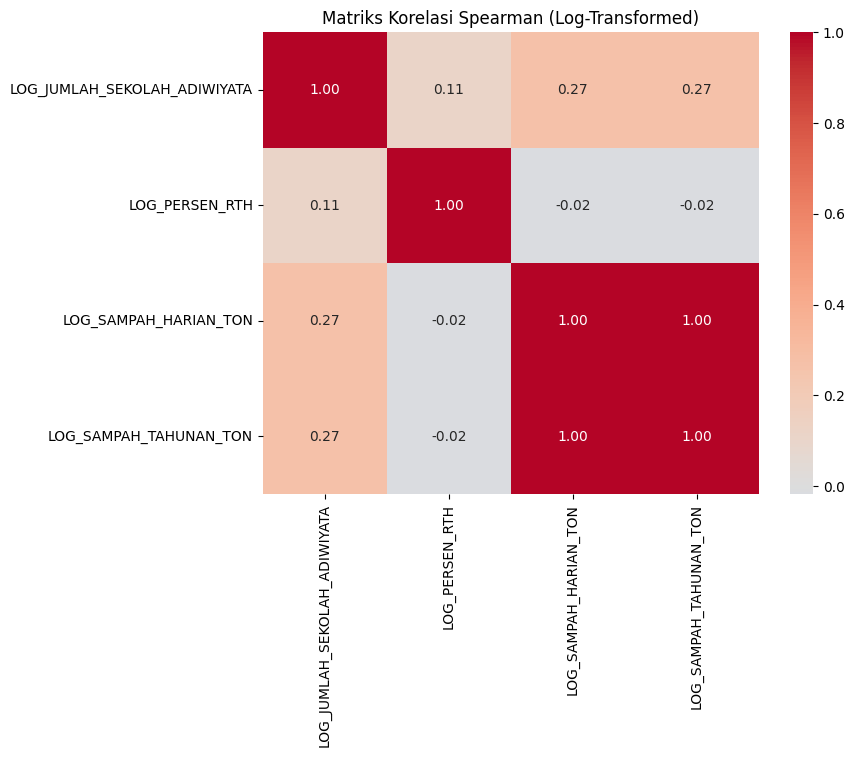

In [ ]:
# KORELASI SPEARMAN

corr_spearman = (
    df_stat[corr_cols]
    .corr(method="spearman")
)

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_spearman,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f"
)
plt.title("Matriks Korelasi Spearman (Log-Transformed)")
plt.show()



> Korelasi Pearson digunakan untuk mengukur hubungan linear antar variabel setelah dilakukan transformasi log.




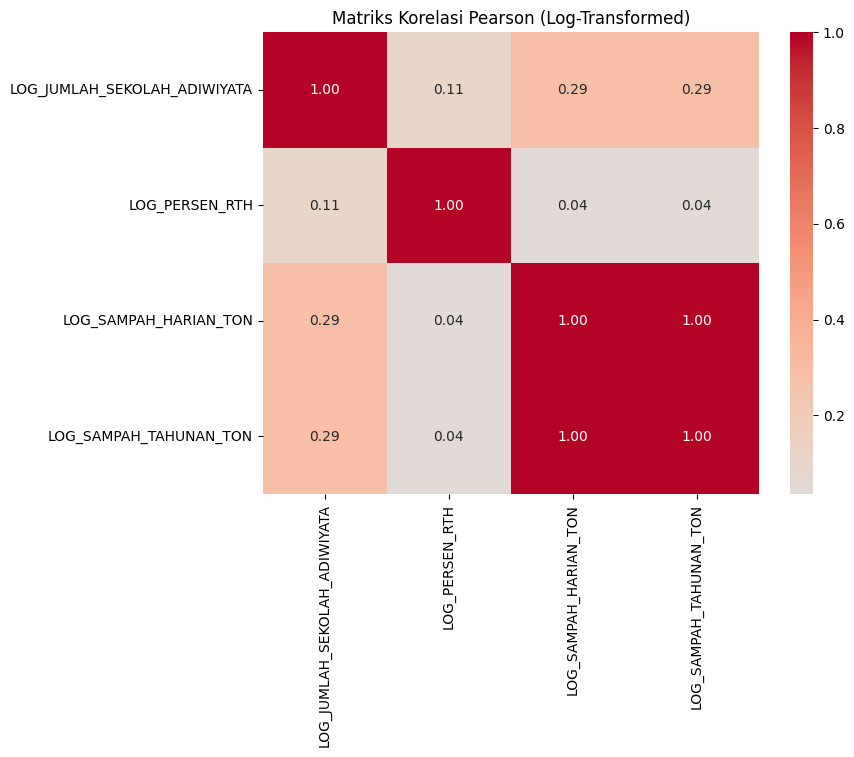

In [ ]:
# Korelasi Pearson

corr_pearson = (
    df_stat[corr_cols]
    .corr(method="pearson")
)

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_pearson,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f"
)
plt.title("Matriks Korelasi Pearson (Log-Transformed)")
plt.show()

### **Normalisasi Berbasis Luas Wilayah**



> Normalisasi berbasis luas wilayah dilakukan untuk menghilangkan bias ukuran wilayah dan memungkinkan perbandingan yang lebih adil antar kabupaten/kota.




In [ ]:
# NORMALISASI INTENSITAS PER LUAS WILAYAH

df_norm = df_stat.copy()

# Hindari pembagian nol
df_norm = df_norm[df_norm["LUAS_WILAYAH"] > 0].copy()

# Rasio intensitas
df_norm["ADIWIYATA_PER_KM2"] = (
    df_norm["JUMLAH_SEKOLAH_ADIWIYATA"] / df_norm["LUAS_WILAYAH"]
)

df_norm["SAMPAH_HARIAN_PER_KM2"] = (
    df_norm["SAMPAH_HARIAN_TON"] / df_norm["LUAS_WILAYAH"]
)

df_norm["SAMPAH_TAHUNAN_PER_KM2"] = (
    df_norm["SAMPAH_TAHUNAN_TON"] / df_norm["LUAS_WILAYAH"]
)

# Log transform (karena tetap skew)
df_norm["LOG_ADIWIYATA_PER_KM2"] = np.log1p(df_norm["ADIWIYATA_PER_KM2"])
df_norm["LOG_SAMPAH_HARIAN_PER_KM2"] = np.log1p(df_norm["SAMPAH_HARIAN_PER_KM2"])
df_norm["LOG_SAMPAH_TAHUNAN_PER_KM2"] = np.log1p(df_norm["SAMPAH_TAHUNAN_PER_KM2"])

# Cek ringkas
df_norm[[
    "LOG_ADIWIYATA_PER_KM2",
    "LOG_SAMPAH_HARIAN_PER_KM2",
    "LOG_SAMPAH_TAHUNAN_PER_KM2"
]].describe()

,LOG_ADIWIYATA_PER_KM2,LOG_SAMPAH_HARIAN_PER_KM2,LOG_SAMPAH_TAHUNAN_PER_KM2
count,154.000000,125.000000,125.000000
mean,0.030157,0.669539,5.020288
std,0.130618,0.846147,1.958603
min,0.000019,0.005208,1.066714
25%,0.000958,0.148009,4.081350
50%,0.003304,0.353193,5.047397
75%,0.011028,0.731853,5.978428
max,1.462078,5.727693,11.624347


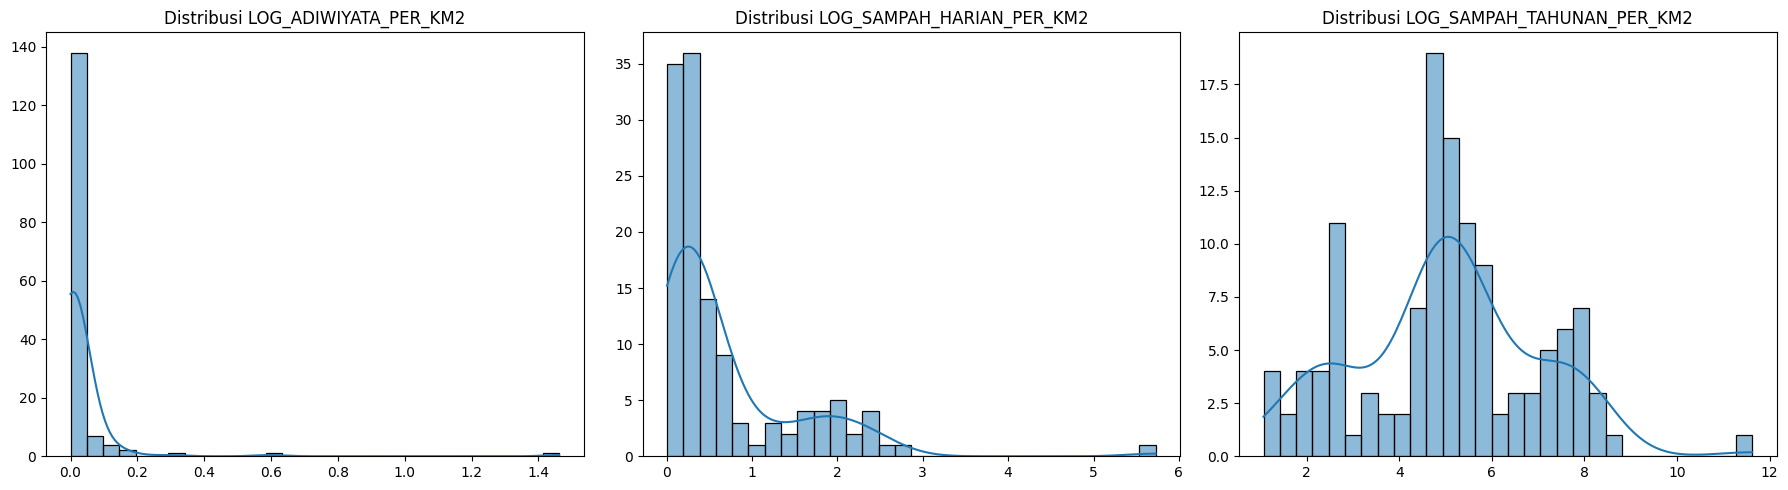

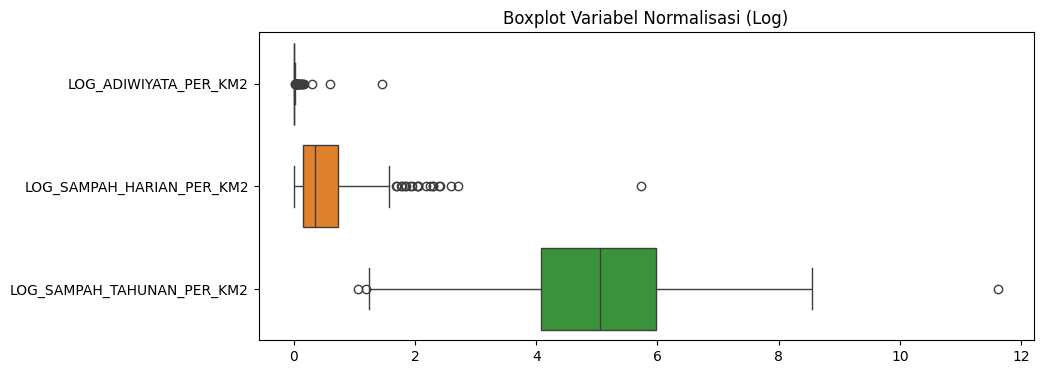

In [ ]:
norm_cols = [
    "LOG_ADIWIYATA_PER_KM2",
    "LOG_SAMPAH_HARIAN_PER_KM2",
    "LOG_SAMPAH_TAHUNAN_PER_KM2"
]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(norm_cols):
    sns.histplot(
        df_norm[col],
        bins=30,
        kde=True,
        ax=axes[i]
    )
    axes[i].set_title(f"Distribusi {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()

# Boxplot gabungan
plt.figure(figsize=(10, 4))
sns.boxplot(
    data=df_norm[norm_cols],
    orient="h"
)
plt.title("Boxplot Variabel Normalisasi (Log)")
plt.show()


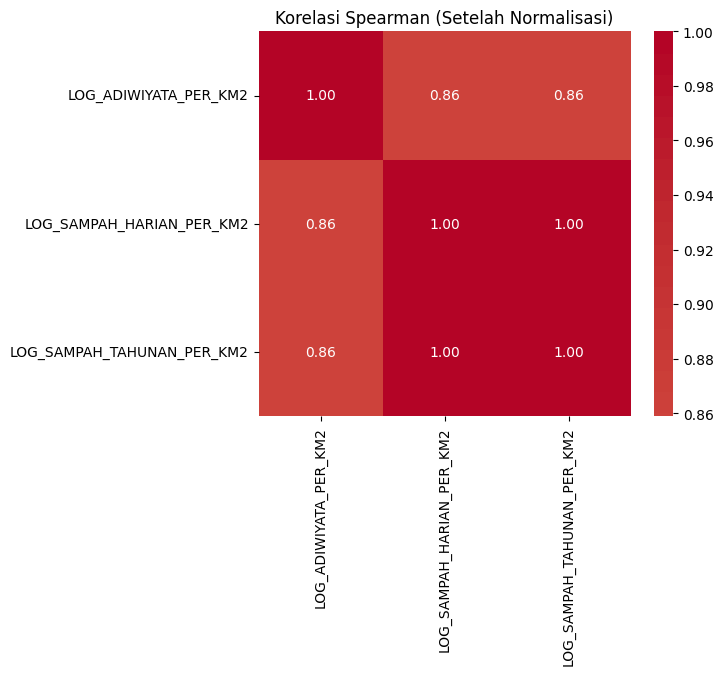

In [ ]:
corr_norm_spearman = (
    df_norm[
        ["LOG_ADIWIYATA_PER_KM2",
         "LOG_SAMPAH_HARIAN_PER_KM2",
         "LOG_SAMPAH_TAHUNAN_PER_KM2"]
    ]
    .corr(method="spearman")
)

plt.figure(figsize=(6, 5))
sns.heatmap(
    corr_norm_spearman,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f"
)
plt.title("Korelasi Spearman (Setelah Normalisasi)")
plt.show()


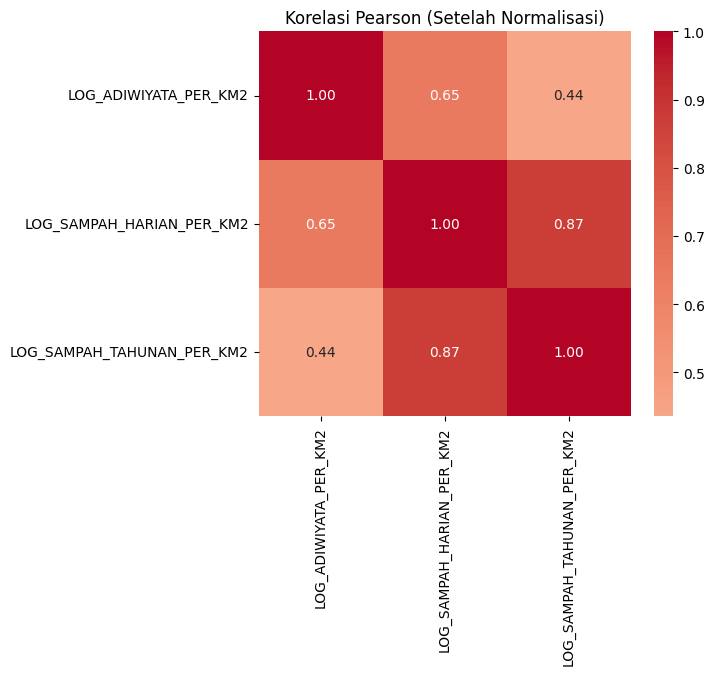

In [ ]:
corr_norm_pearson = (
    df_norm[
        ["LOG_ADIWIYATA_PER_KM2",
         "LOG_SAMPAH_HARIAN_PER_KM2",
         "LOG_SAMPAH_TAHUNAN_PER_KM2"]
    ]
    .corr(method="pearson")
)

plt.figure(figsize=(6, 5))
sns.heatmap(
    corr_norm_pearson,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f"
)
plt.title("Korelasi Pearson (Setelah Normalisasi)")
plt.show()


### EDA Visualisasi

Apakah wilayah dengan kepadatan sekolah Adiwiyata tinggi juga memiliki kepadatan sampah harian tinggi?

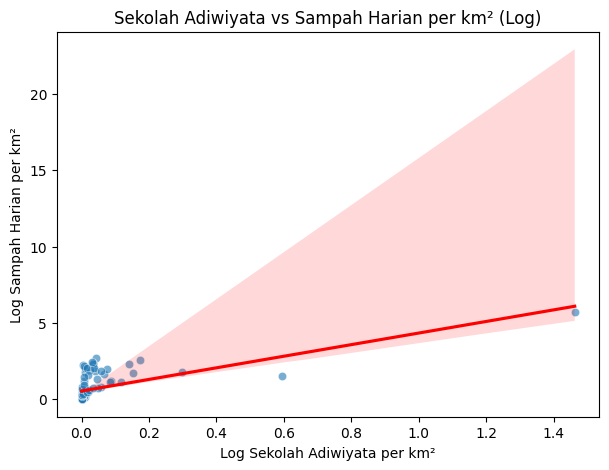

In [ ]:
# Sekolah vs Sampah (HARlAN) per km²
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=df_norm,
    x="LOG_ADIWIYATA_PER_KM2",
    y="LOG_SAMPAH_HARIAN_PER_KM2",
    alpha=0.6
)
sns.regplot(
    data=df_norm,
    x="LOG_ADIWIYATA_PER_KM2",
    y="LOG_SAMPAH_HARIAN_PER_KM2",
    scatter=False,
    color="red"
)
plt.title("Sekolah Adiwiyata vs Sampah Harian per km² (Log)")
plt.xlabel("Log Sekolah Adiwiyata per km²")
plt.ylabel("Log Sampah Harian per km²")
plt.show()


Apakah pola yang sama juga terlihat pada akumulasi tahunan?

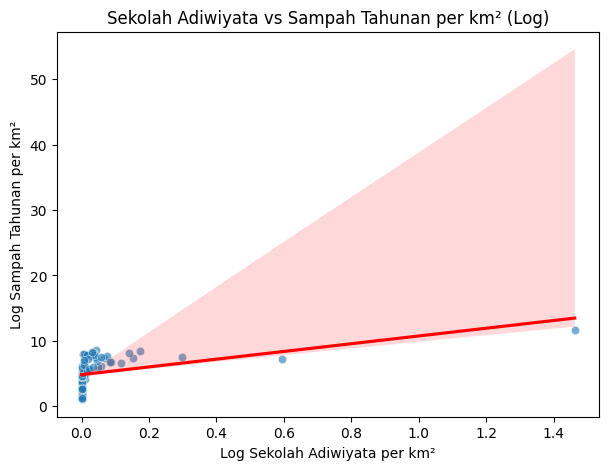

In [ ]:
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=df_norm,
    x="LOG_ADIWIYATA_PER_KM2",
    y="LOG_SAMPAH_TAHUNAN_PER_KM2",
    alpha=0.6
)
sns.regplot(
    data=df_norm,
    x="LOG_ADIWIYATA_PER_KM2",
    y="LOG_SAMPAH_TAHUNAN_PER_KM2",
    scatter=False,
    color="red"
)
plt.title("Sekolah Adiwiyata vs Sampah Tahunan per km² (Log)")
plt.xlabel("Log Sekolah Adiwiyata per km²")
plt.ylabel("Log Sampah Tahunan per km²")
plt.show()


Apakah peningkatan intensitas Sekolah Adiwiyata di suatu wilayah diikuti oleh perubahan sistematis pada intensitas timbulan sampah?

/tmp/ipython-input-322846083.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("BIN_ADIWIYATA")


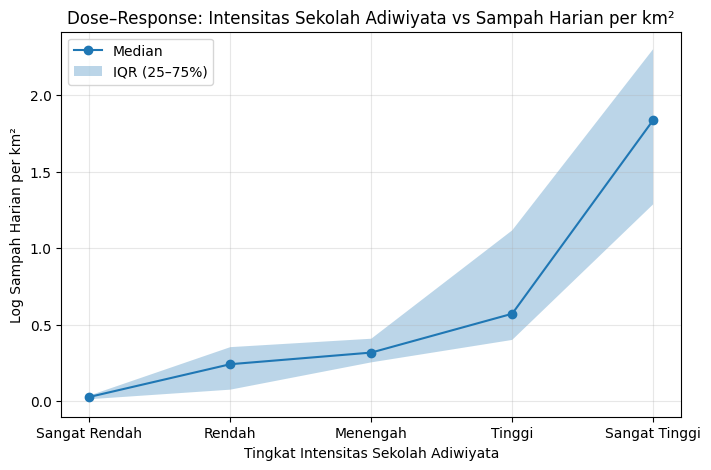

In [ ]:
# Plot dose–response dengan median dan IQR
df_dr = df_norm.copy()

# Membagi intensitas Adiwiyata ke dalam kuantil (dose levels)
df_dr["BIN_ADIWIYATA"] = pd.qcut(
    df_dr["LOG_ADIWIYATA_PER_KM2"],
    q=5,
    labels=[
        "Sangat Rendah",
        "Rendah",
        "Menengah",
        "Tinggi",
        "Sangat Tinggi"
    ]
)

dose_plot = (
    df_dr
    .groupby("BIN_ADIWIYATA")
    .agg(
        median=("LOG_SAMPAH_HARIAN_PER_KM2", "median"),
        q25=("LOG_SAMPAH_HARIAN_PER_KM2", lambda x: x.quantile(0.25)),
        q75=("LOG_SAMPAH_HARIAN_PER_KM2", lambda x: x.quantile(0.75))
    )
    .reset_index()
)

plt.figure(figsize=(8, 5))
plt.plot(dose_plot["BIN_ADIWIYATA"], dose_plot["median"], marker="o", label="Median")
plt.fill_between(
    dose_plot["BIN_ADIWIYATA"],
    dose_plot["q25"],
    dose_plot["q75"],
    alpha=0.3,
    label="IQR (25–75%)"
)

plt.title("Dose–Response: Intensitas Sekolah Adiwiyata vs Sampah Harian per km²")
plt.xlabel("Tingkat Intensitas Sekolah Adiwiyata")
plt.ylabel("Log Sampah Harian per km²")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


JIka wilayah dikelompokkan berdasarkan intensitas sekolah, bagaimana bentuk perilaku sampahnya?

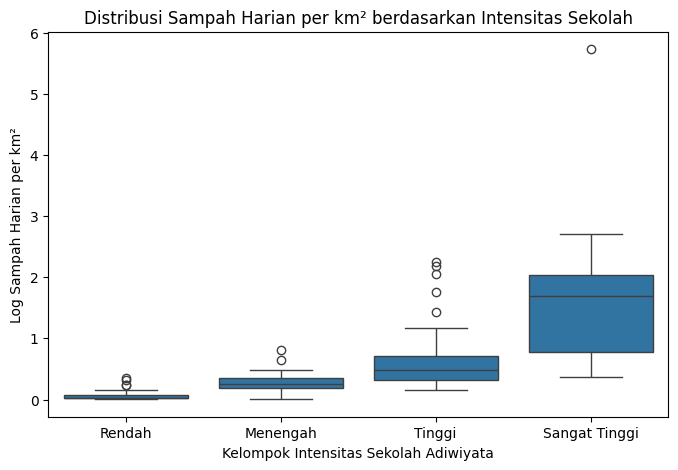

In [ ]:
df_norm["BIN_ADIWIYATA"] = pd.qcut(
    df_norm["LOG_ADIWIYATA_PER_KM2"],
    q=4,
    labels=["Rendah", "Menengah", "Tinggi", "Sangat Tinggi"]
)

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_norm,
    x="BIN_ADIWIYATA",
    y="LOG_SAMPAH_HARIAN_PER_KM2"
)
plt.title("Distribusi Sampah Harian per km² berdasarkan Intensitas Sekolah")
plt.xlabel("Kelompok Intensitas Sekolah Adiwiyata")
plt.ylabel("Log Sampah Harian per km²")
plt.show()


Apakah hubungan antara intensitas Sekolah Adiwiyata dan timbulan sampah berbeda antara wilayah dengan jumlah sampah relatif rendah dan wilayah dengan jumlah sampah relatif tinggi?

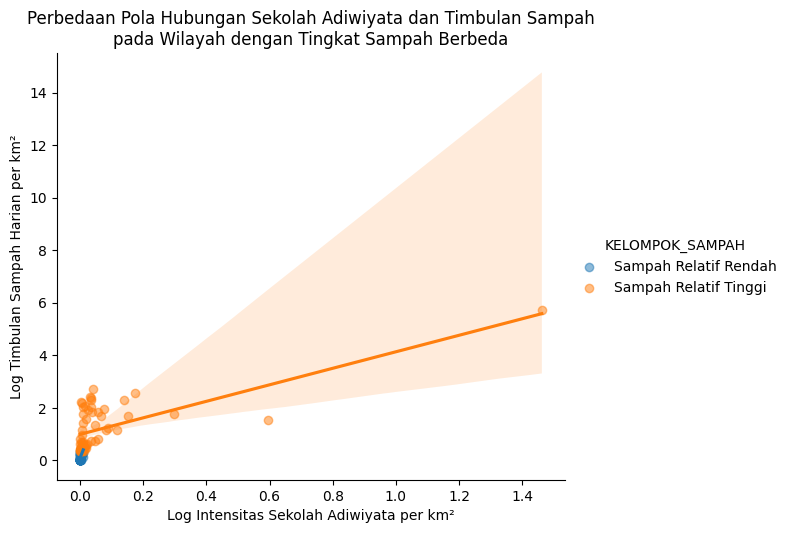

In [ ]:
# Salin dataset hasil normalisasi
df_ctx = df_norm.copy()

# Kelompokkan wilayah berdasarkan tingkat sampah (berdasarkan data itu sendiri)
df_ctx["KELOMPOK_SAMPAH"] = pd.qcut(
    df_ctx["LOG_SAMPAH_HARIAN_PER_KM2"],
    q=2,
    labels=["Sampah Relatif Rendah", "Sampah Relatif Tinggi"]
)

# Visualisasi hubungan Adiwiyata vs Sampah per kelompok
sns.lmplot(
    data=df_ctx,
    x="LOG_ADIWIYATA_PER_KM2",
    y="LOG_SAMPAH_HARIAN_PER_KM2",
    hue="KELOMPOK_SAMPAH",
    scatter_kws={"alpha": 0.5},
    height=5,
    aspect=1.2
)

plt.title(
    "Perbedaan Pola Hubungan Sekolah Adiwiyata dan Timbulan Sampah\n"
    "pada Wilayah dengan Tingkat Sampah Berbeda"
)
plt.xlabel("Log Intensitas Sekolah Adiwiyata per km²")
plt.ylabel("Log Timbulan Sampah Harian per km²")
plt.show()


## Modelling

In [ ]:
# BERSIHKAN DATA IKA & IKU

df_ika_clean = df_ika.rename(columns={
    "Provinsi": "PROVINSI",
    "Indeks Kualitas Air": "IKA"
}).copy()

df_iku_clean = df_iku.rename(columns={
    "Provinsi": "PROVINSI",
    "Indeks Kualitas Udara": "IKU"
}).copy()

for df in [df_ika_clean, df_iku_clean]:
    df["PROVINSI"] = (
        df["PROVINSI"]
        .astype(str)
        .str.upper()
        .str.strip()
    )

In [ ]:
# PASTIKAN df_norm PUNYA PROVINSI

df_norm["PROVINSI"] = (
    df_rth_clean
    .drop_duplicates("KABKOT_STD")
    .set_index("KABKOT_STD")
    .loc[df_norm["KABKOT_STD"], "Provinsi"]
    .values
)

df_norm["PROVINSI"] = (
    df_norm["PROVINSI"]
    .astype(str)
    .str.upper()
    .str.strip()
)


In [ ]:
# MERGE IKA & IKU KE df_norm

df_norm = (
    df_norm
    .merge(df_ika_clean[["PROVINSI", "IKA"]], on="PROVINSI", how="left")
    .merge(df_iku_clean[["PROVINSI", "IKU"]], on="PROVINSI", how="left")
)

# Cek cepat
df_norm[["PROVINSI", "IKA", "IKU"]].head()


,PROVINSI,IKA,IKU
0,ACEH,NaN,92.81
1,SUMATERA BARAT,54.5,89.66
2,SUMATERA BARAT,61.6,89.66
3,KEPULAUAN BANGKA BELITUNG,60.1,NaN
4,KEPULAUAN BANGKA BELITUNG,60.1,NaN


In [ ]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   KABKOT_STD                    161 non-null    object  
 1   JUMLAH_SEKOLAH_ADIWIYATA      161 non-null    int64   
 2   PERSEN_RTH                    120 non-null    float64 
 3   LUAS_WILAYAH                  161 non-null    float64 
 4   SAMPAH_HARIAN_TON             131 non-null    float64 
 5   SAMPAH_TAHUNAN_TON            131 non-null    float64 
 6   LOG_JUMLAH_SEKOLAH_ADIWIYATA  161 non-null    float64 
 7   LOG_PERSEN_RTH                120 non-null    float64 
 8   LOG_LUAS_WILAYAH              161 non-null    float64 
 9   LOG_SAMPAH_HARIAN_TON         131 non-null    float64 
 10  LOG_SAMPAH_TAHUNAN_TON        131 non-null    float64 
 11  ADIWIYATA_PER_KM2             161 non-null    float64 
 12  SAMPAH_HARIAN_PER_KM2         131 non-null    floa

In [ ]:
# MEMBENTUK LABEL

df_model = df_norm.copy()

median_adiwiyata = df_model["LOG_ADIWIYATA_PER_KM2"].median()
median_ika = df_model["IKA"].median()
median_iku = df_model["IKU"].median()

df_model["ADIWIYATA_TINGGI"] = (
    df_model["LOG_ADIWIYATA_PER_KM2"] >= median_adiwiyata
)

df_model["LINGKUNGAN_RENDAH"] = (
    (df_model["IKA"] < median_ika) |
    (df_model["IKU"] < median_iku)
)

df_model["KETIDAKSESUAIAN"] = (
    df_model["ADIWIYATA_TINGGI"] &
    df_model["LINGKUNGAN_RENDAH"]
).astype(int)

df_model["KETIDAKSESUAIAN"].value_counts()


,count
KETIDAKSESUAIAN,
0,112
1,49


In [ ]:
df_model["PROVINSI"].value_counts().head(69)


,count
PROVINSI,
JAWA TENGAH,30
JAWA TIMUR,27
SUMATERA BARAT,12
JAWA BARAT,10
KALIMANTAN SELATAN,9
SULAWESI SELATAN,8
KALIMANTAN TIMUR,8
RIAU,7
DKI JAKARTA,5


In [ ]:
# FITUR & TARGET
# ==============================

features = [
    "LOG_ADIWIYATA_PER_KM2",
    "LOG_SAMPAH_HARIAN_PER_KM2",
    "LOG_SAMPAH_TAHUNAN_PER_KM2",
    "PERSEN_RTH",
    "LUAS_WILAYAH"
]

X = df_model[features]
y = df_model["KETIDAKSESUAIAN"]

print("Ukuran data:", X.shape)
print("\nDistribusi label:")
print(y.value_counts(normalize=True))

Ukuran data: (161, 5)

Distribusi label:
KETIDAKSESUAIAN
0    0.695652
1    0.304348
Name: proportion, dtype: float64


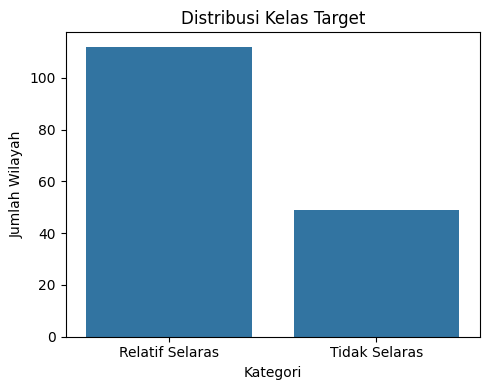

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x="KETIDAKSESUAIAN", data=df_model)
plt.xticks([0,1], ["Relatif Selaras", "Tidak Selaras"])
plt.title("Distribusi Kelas Target")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Wilayah")
plt.tight_layout()
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Train:", X_train.shape)
print("Test :", X_test.shape)


Train: (112, 5)
Test : (49, 5)


In [ ]:
param_dist = {
    "n_estimators": [200, 300, 400, 500, 700, 1000],
    "learning_rate": [0.01, 0.03, 0.05, 0.1],
    "max_depth": [3, 5, 7, 9, -1],
    "num_leaves": [15, 31, 63, 127],
    "min_child_samples": [5, 10, 20, 30],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0]
}


In [ ]:
base_model = LGBMClassifier(
    objective="binary",
    class_weight="balanced",
    random_state=42
)

random_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=40,               # cukup kuat, tidak berlebihan
    scoring="f1",            # fokus kelas minoritas
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)


In [ ]:
best_lgbm = random_search.best_estimator_

print("Best Parameters:")
print(random_search.best_params_)


In [ ]:
# Prediksi
y_pred = best_lgbm.predict(X_test)

# Akurasi
acc = accuracy_score(y_test, y_pred)
print(f"\nAkurasi: {acc:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(
    y_test,
    y_pred,
    target_names=["Relatif Selaras", "Tidak Selaras"]
))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Relatif Selaras", "Tidak Selaras"],
    yticklabels=["Relatif Selaras", "Tidak Selaras"]
)
plt.title("Confusion Matrix LightGBM (RandomizedSearchCV)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.tight_layout()
plt.show()

In [ ]:
feature_importance = pd.DataFrame({
    "Fitur": X.columns,
    "Importance": best_lgbm.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(
    data=feature_importance,
    x="Importance",
    y="Fitur"
)
plt.title("Feature Importance LightGBM (Tuned)")
plt.tight_layout()
plt.show()

feature_importance


In [ ]:
print(f"Best CV F1-score: {random_search.best_score_:.3f}")


In [67]:
import joblib
from google.colab import files

# Simpan model terbaik ke file .pkl
joblib.dump(best_lgbm, 'model_lgbm_adiwiyata.pkl')

print("Model berhasil disimpan sebagai 'model_lgbm_adiwiyata.pkl'")
files.download('model_lgbm_adiwiyata.pkl')

Model berhasil disimpan sebagai 'model_lgbm_adiwiyata.pkl'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>